Stacked Bar Graph


This is an example for creating a stacked bar plot.
Use-case example of how the percent distribution of phenotypes differs for  different genes.
Each % of each phenotype for 1 gene is stacked on top of the other phenotype so that it adds to 100% distribution. 
This shows a clear visual representation of how certain phenotypes are distributed and allows for easy visual comparison to other genes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
# Sample DataFrame
df = pd.DataFrame([['Bipolar, < 4 centrioles', 1.052631579, 0.0, 1.041666667, 2.43902439, 5.263157895], ['Bipolar, 4 centrioles', 92.63157895, 38.18181818, 58.33333333, 52.03252033, 70.17543859999999], ['Bipolar, >4 centrioles', 2.105263158, 36.36363636, 21.875, 30.89430894, 17.54385965], ['Multipolar, < 4 centrioles', 0.0, 0.0, 0.0, 0.0, 0.0], ['Multipolar, 4 centrioles', 0.0, 0.0, 0.0, 0.0, 0.0], ['Multipolar, >4 centrioles', 4.210526316, 25.45454545, 18.75, 14.63414634, 7.01754386]])
df.columns = ['phenotype','gene1','gene2','gene3','gene4','gene5'] 
df
# df = pd.read_csv('phenotypes.csv')

,phenotype,gene1,gene2,gene3,gene4,gene5
0,"Bipolar, < 4 centrioles",1.052632,0.000000,1.041667,2.439024,5.263158
1,"Bipolar, 4 centrioles",92.631579,38.181818,58.333333,52.032520,70.175439
2,"Bipolar, >4 centrioles",2.105263,36.363636,21.875000,30.894309,17.543860
3,"Multipolar, < 4 centrioles",0.000000,0.000000,0.000000,0.000000,0.000000
4,"Multipolar, 4 centrioles",0.000000,0.000000,0.000000,0.000000,0.000000
5,"Multipolar, >4 centrioles",4.210526,25.454545,18.750000,14.634146,7.017544


In [4]:
# Creates a dictionary where each row corresponds to the phenotype(KEY). 
# Each KEY corresponds to the % distribution (VALUES) of each gene for that phenotype.
genes_dict = {} 
for i in range(len(df.iloc[:,0])):
    genes_dict[df.iloc[i,0]] = df.iloc[i,1:]
genes_dict

{'Bipolar, < 4 centrioles': gene1    1.05263
 gene2          0
 gene3    1.04167
 gene4    2.43902
 gene5    5.26316
 Name: 0, dtype: object, 'Bipolar, 4 centrioles': gene1    92.6316
 gene2    38.1818
 gene3    58.3333
 gene4    52.0325
 gene5    70.1754
 Name: 1, dtype: object, 'Bipolar, >4 centrioles': gene1    2.10526
 gene2    36.3636
 gene3     21.875
 gene4    30.8943
 gene5    17.5439
 Name: 2, dtype: object, 'Multipolar, < 4 centrioles': gene1    0
 gene2    0
 gene3    0
 gene4    0
 gene5    0
 Name: 3, dtype: object, 'Multipolar, 4 centrioles': gene1    0
 gene2    0
 gene3    0
 gene4    0
 gene5    0
 Name: 4, dtype: object, 'Multipolar, >4 centrioles': gene1    4.21053
 gene2    25.4545
 gene3      18.75
 gene4    14.6341
 gene5    7.01754
 Name: 5, dtype: object}

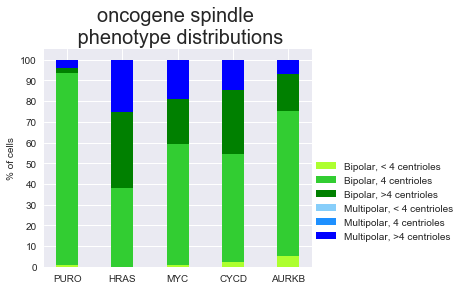

In [5]:
# develop the bar container and assign the arguments for plt.bar() 
ax = plt.subplot(1,1,1) # create a subplot for the legend to be inserted next to the bar plot.
ind = np.arange(len(df.columns)-1) # Array containing x locations for each bar
width = 0.4  # the width of the bars

colors = ['greenyellow', 'limegreen','green','lightskyblue','dodgerblue','blue'] # list of specific colors for each phenotype

bar_stacks = pd.Series(0,index = ['gene1','gene2','gene3','gene4','gene5']) # empty Pandas series where the previous bar values are summed, stacking each phenotype (bar) on top of the previous.
bar_containers = [] # list containing the bars that create each genes information

for (key,i) in zip(genes_dict, range(len(colors))):
    bar_containers += plt.bar(ind, genes_dict[key], width, bottom = bar_stacks, color = colors[i] )
    bar_stacks = bar_stacks.add(genes_dict[key])
    
# label axes and legend
plt.title('oncogene spindle \n phenotype distributions', size = 20)
plt.ylabel('% of cells', size = 10)
plt.xticks(ind, ('PURO', 'HRAS', 'MYC', 'CYCD', 'AURKB'), size = 10)
plt.yticks(np.arange(0, 110, 10), size = 10)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(df.iloc[:,0],
         bbox_to_anchor=(1, 0.5),loc=2, borderaxespad=0.,
         prop={'size': 10})

plt.show() 
